In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data (main)

In [2]:
df_tweet = pd.read_csv(r"E:\BINAR\Binar-Gold-Challenge\Dataset\data.csv", encoding='ISO-8859-1')
df_tweet.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [3]:
print("Dataset size:", df_tweet.shape)
print("Columns are:", df_tweet.columns)

Dataset size: (13169, 13)
Columns are: Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong'],
      dtype='object')


In [4]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


# Cek Duplicate

In [66]:
df_tweet.duplicated(subset='Tweet').sum()

146

In [67]:
df_tweet.duplicated().sum()

125

In [68]:
df_tweet = df_tweet.drop_duplicates(subset='Tweet')

In [69]:
df_tweet.duplicated(subset='Tweet').sum()

0

**Menggunakan subset='Tweet' dikarenakan terdapat perbedaan hasil antara df_tweet.duplicated(subset='Tweet').sum() dan df_tweet.duplicated().sum() artinya, pada Tweet yang sama terdapat perbedaan value pada kolom lainnya, hal ini dapat memerikan hasil analisis yang berbeda pada Tweet yang sama. oleh karena itu digunkan subset='Tweet' untuk menghapus duplicate berdasarkan kolom Tweet saja**

# Pie Chart dari Kolom HS dan Abuisve

In [5]:
abusive = df_tweet['Abusive'].value_counts()
abusive

Abusive
0    8126
1    5043
Name: count, dtype: int64

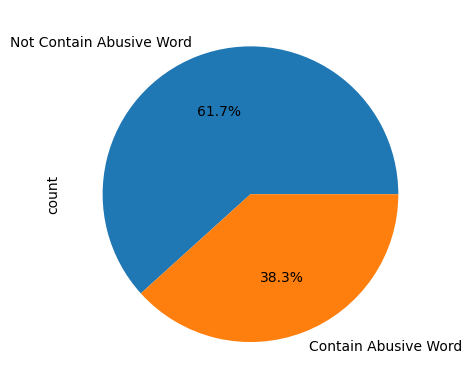

In [56]:
labels = ['Not Contain Abusive Word', 'Contain Abusive Word']
# Membuat visualisasi menggunakan pie chart
abusive.plot(kind='pie', labels= labels, autopct='%1.1f%%')
plt.show()

In [54]:
HateSpeech = df_tweet['HS'].value_counts()
HateSpeech

HS
0    7608
1    5561
Name: count, dtype: int64

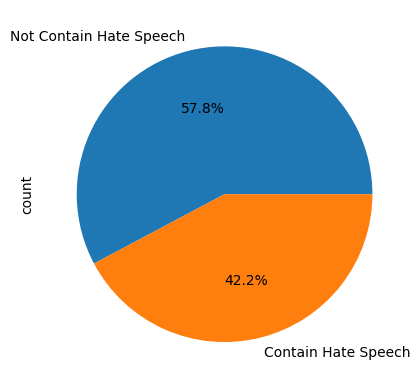

In [57]:
labels = ['Not Contain Hate Speech', 'Contain Hate Speech']
# Membuat visualisasi menggunakan pie chart
HateSpeech.plot(kind='pie', labels= labels, autopct='%1.1f%%')
plt.show()

# Filter Data (main) for cleaning

In [70]:
df = pd.DataFrame(df_tweet[['Tweet']])
df

,Tweet
0,- disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...
2,"41. Kadang aku berfikir, kenapa aku tetap perc..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4,USER USER Kaum cebong kapir udah keliatan dong...
...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...
13165,USER Kasur mana enak kunyuk'
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...
13167,USER USER USER USER Bom yang real mudah terdet...


## Visualization of word occurances

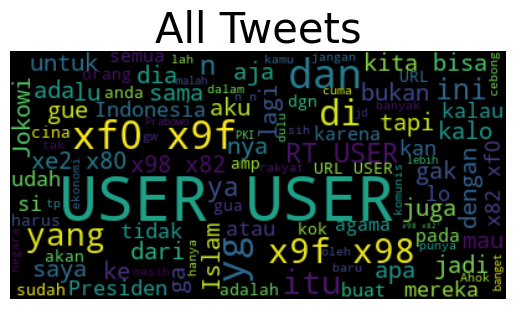

In [71]:
from wordcloud import WordCloud, ImageColorGenerator
# Start with one review:
tweet_All = " ".join(text for text in df.Tweet)

# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_All)

# Display the generated image:
#plt.figure(figsize  = (15,15))
plt.imshow(wordcloud_ALL, interpolation='bilinear')
plt.title('All Tweets', fontsize=30)
plt.axis('off')
plt.show()

# Cleaning Tweet Data

In [72]:
#Fucntion to Clean tweet data
def Clean(text):
    #lowercase for every word
    text = text.lower()

    #Clean Pattern
    #remove USER
    text = re.sub(r'user', ' ', text)
    #remove 'RT'
    text = re.sub(r'rt', ' ', text)
    #remove 'URL'
    text = re.sub(r'url', ' ', text)
    #remove HTTPS
    text = re.sub(r'https', ' ', text)
    #remove HTTP
    text = re.sub(r'http', ' ', text)
    #remove &amp
    text = re.sub(r'&amp', ' ', text)

    #Clean_Unnecessary_Character
    #remove \n or every word afte '\' with space
    text = re.sub(r'\\+[a-zA-Z0-9]+', ' ', text)
    #remove text emoji
    text = re.sub(r'[^a-zA-Z0-9\s]{2,}|:[a-zA-Z0-9]{0,}', ' ', text)
    #remove all unnecessary character 
    text = re.sub(r'[^0-9a-zA-Z\s]+', ' ', text)
    #remove all number
    text = re.sub(r'[0-9]+', ' ', text)
    #remove extra space
    text = re.sub(r'  +', ' ', text)
    #remove space at the start or the end of string
    text = re.sub(r'^ +| +$', '', text)
    
    return text

#apply Clean function
df['clean_Tweet'] = df['Tweet'].apply(Clean)
df.head(10)

,Tweet,clean_Tweet
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...
1,RT USER: USER siapa yang telat ngasih tau elu?...,siapa yang telat ngasih tau elu edan sarap gue...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",kadang aku berfikir kenapa aku tetap percaya p...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku tau matamu sipit tapi diliat dari ...
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kapir udah keliatan dongoknya dari...
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,ya bani taplak dkk
6,deklarasi pilkada 2018 aman dan anti hoax warg...,deklarasi pilkada aman dan anti hoax warga duk...
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,gue baru aja kelar re watch aldnoah zero palin...
8,Nah admin belanja satu lagi port terbaik nak m...,nah admin belanja satu lagi po terbaik nak mak...
9,USER Enak lg klo smbil ngewe',enak lg klo smbil ngewe


In [75]:
#tokenization Function
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['clean_Tweet'].apply(tokenization)
df.head()

,Tweet,clean_Tweet,Tweet_tokenized,Tweet_normalization
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...,"[disaat, semua, cowok, berusaha, melacak, perh...","[di saat, semua, cowok, berusaha, melacak, per..."
1,RT USER: USER siapa yang telat ngasih tau elu?...,siapa yang telat ngasih tau elu edan sarap gue...,"[siapa, yang, telat, ngasih, tau, elu, edan, s...","[siapa, yang, telat, memberi, tau, kamu, edan,..."
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",kadang aku berfikir kenapa aku tetap percaya p...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...","[kadang, aku, berpikir, kenapa, aku, tetap, pe..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku tau matamu sipit tapi diliat dari ...,"[aku, itu, aku, tau, matamu, sipit, tapi, dili...","[aku, itu, aku, tau, matamu, sipit, tapi, dili..."
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kapir udah keliatan dongoknya dari...,"[kaum, cebong, kapir, udah, keliatan, dongokny...","[kaum, cebong, kafir, sudah, kelihatan, dongok..."


In [76]:
#import file new_kamusalay.csv
kamus_alay = pd.read_csv(r"E:\BINAR\Binar-Gold-Challenge\Dataset\new_kamusalay.csv", encoding = 'ISO-8859-1', header = None)
kamus_alay = kamus_alay.rename(columns={0: 'kata alay', 1: 'arti kata'})

#Create dictionary from kamus_alay
kamus_alay_dict = dict(zip(kamus_alay['kata alay'], kamus_alay['arti kata']))

#normalization function to convert every word tha contain 'kata alay' to 'arti kata'
def normalization(text):
    newlist = []
    for word in text:
        if word in kamus_alay_dict:
            text = kamus_alay_dict[word]
            newlist.append(text)
        else:
            text = word
            newlist.append(text)
    return newlist

#apply normalization function
df['Tweet_normalization'] = df['Tweet_tokenized'].apply(normalization)
df.head()

,Tweet,clean_Tweet,Tweet_tokenized,Tweet_normalization
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...,"[disaat, semua, cowok, berusaha, melacak, perh...","[di saat, semua, cowok, berusaha, melacak, per..."
1,RT USER: USER siapa yang telat ngasih tau elu?...,siapa yang telat ngasih tau elu edan sarap gue...,"[siapa, yang, telat, ngasih, tau, elu, edan, s...","[siapa, yang, telat, memberi, tau, kamu, edan,..."
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",kadang aku berfikir kenapa aku tetap percaya p...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...","[kadang, aku, berpikir, kenapa, aku, tetap, pe..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku tau matamu sipit tapi diliat dari ...,"[aku, itu, aku, tau, matamu, sipit, tapi, dili...","[aku, itu, aku, tau, matamu, sipit, tapi, dili..."
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kapir udah keliatan dongoknya dari...,"[kaum, cebong, kapir, udah, keliatan, dongokny...","[kaum, cebong, kafir, sudah, kelihatan, dongok..."


source: Stopwords By : Tala from paper : A Study of Stemming Effects on Information Retrieval in Bahasa Indonesia Source : https://github.com/masdevid/ID-Stopwords

In [77]:
#remove stopwords
#stopword list
f = open(r"E:\BINAR\Binar-Gold-Challenge\Dataset\tala-stopwords-indonesia.txt")
stopword_list = []
for line in f:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    stopword_list.append(line_list[0])
f.close()

stopword_list.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       'gue', 'yah', 'orang'])
stopword_list = set(stopword_list)

#remove stopword function
def remove_stopwords(text):
    text = [word for word in text if word not in stopword_list]
    return text

df['Tweet_non_stopwords'] = df['Tweet_normalization'].apply(remove_stopwords)
df.head()

,Tweet,clean_Tweet,Tweet_tokenized,Tweet_normalization,Tweet_non_stopwords
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...,"[disaat, semua, cowok, berusaha, melacak, perh...","[di saat, semua, cowok, berusaha, melacak, per...","[di saat, cowok, berusaha, melacak, perhatian,..."
1,RT USER: USER siapa yang telat ngasih tau elu?...,siapa yang telat ngasih tau elu edan sarap gue...,"[siapa, yang, telat, ngasih, tau, elu, edan, s...","[siapa, yang, telat, memberi, tau, kamu, edan,...","[telat, edan, sarap, bergaul, cigax, jifla, ca..."
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",kadang aku berfikir kenapa aku tetap percaya p...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...","[kadang, aku, berpikir, kenapa, aku, tetap, pe...","[kadang, berpikir, percaya, tuhan, jatuh, berk..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku tau matamu sipit tapi diliat dari ...,"[aku, itu, aku, tau, matamu, sipit, tapi, dili...","[aku, itu, aku, tau, matamu, sipit, tapi, dili...","[matamu, sipit]"
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kapir udah keliatan dongoknya dari...,"[kaum, cebong, kapir, udah, keliatan, dongokny...","[kaum, cebong, kafir, sudah, kelihatan, dongok...","[kaum, cebong, kafir, dongoknya, dungu, haha]"


In [78]:
df.shape

(13023, 5)

# Useful function

In [17]:
#Other Option for Tokenization
from nltk.tokenize import word_tokenize

### Tokenization into list

In [18]:
Tweet = df.clean_Tweet.to_list()

In [19]:
Tweet_split = []
for kalimat in Tweet:
    kalimat_split = kalimat.split()
    Tweet_split.append(kalimat_split)

for i in range(10):
    print(i)
    print(Tweet_split[i])

0
['disaat', 'semua', 'cowok', 'berusaha', 'melacak', 'perhatian', 'gue', 'loe', 'lantas', 'remehkan', 'perhatian', 'yg', 'gue', 'kasih', 'khusus', 'ke', 'elo', 'basic', 'elo', 'cowok', 'bego']
1
['siapa', 'yang', 'telat', 'ngasih', 'tau', 'elu', 'edan', 'sarap', 'gue', 'bergaul', 'dengan', 'cigax', 'jifla', 'calis', 'sama', 'siapa', 'noh', 'licew', 'juga']
2
['kadang', 'aku', 'berfikir', 'kenapa', 'aku', 'tetap', 'percaya', 'pada', 'tuhan', 'padahal', 'aku', 'selalu', 'jatuh', 'berkali', 'kali', 'kadang', 'aku', 'merasa', 'tuhan', 'itu', 'ninggalkan', 'aku', 'sendirian', 'ketika', 'orangtuaku', 'berencana', 'berpisah', 'ketika', 'kakakku', 'lebih', 'memilih', 'jadi', 'kristen', 'ketika', 'aku', 'anak', 'ter']
3
['aku', 'itu', 'aku', 'tau', 'matamu', 'sipit', 'tapi', 'diliat', 'dari', 'mana', 'itu', 'aku']
4
['kaum', 'cebong', 'kapir', 'udah', 'keliatan', 'dongoknya', 'dari', 'awal', 'tambah', 'dongok', 'lagi', 'hahahah']
5
['ya', 'bani', 'taplak', 'dkk']
6
['deklarasi', 'pilkada', 'am

### Selecting the 'alay' word 

In [20]:
wn = list(kamus_alay_dict.values())
def lemmatization(text):
    text = [kamus_alay_dict[word] for word in text if word in kamus_alay_dict]
    return text

In [21]:
df['Tweet_edit_alay'] = df['Tweet_tokenized'].apply(lemmatization)
df.head()

,Tweet,clean_Tweet,Tweet_tokenized,Tweet_normalization,Tweet_non_stopwords,Tweet_edit_alay
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...,"[disaat, semua, cowok, berusaha, melacak, perh...","[di saat, semua, cowok, berusaha, melacak, per...","[di saat, cowok, berusaha, melacak, perhatian,...","[di saat, kamu, yang, kamu, kamu]"
1,RT USER: USER siapa yang telat ngasih tau elu?...,siapa yang telat ngasih tau elu edan sarap gue...,"[siapa, yang, telat, ngasih, tau, elu, edan, s...","[siapa, yang, telat, memberi, tau, kamu, edan,...","[telat, edan, sarap, bergaul, cigax, jifla, ca...","[memberi, kamu, itu]"
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",kadang aku berfikir kenapa aku tetap percaya p...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...","[kadang, aku, berpikir, kenapa, aku, tetap, pe...","[kadang, berpikir, percaya, tuhan, jatuh, berk...","[berpikir, meninggalkan, orang tuaku]"
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku tau matamu sipit tapi diliat dari ...,"[aku, itu, aku, tau, matamu, sipit, tapi, dili...","[aku, itu, aku, tau, matamu, sipit, tapi, dili...","[matamu, sipit]",[dilihat]
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kapir udah keliatan dongoknya dari...,"[kaum, cebong, kapir, udah, keliatan, dongokny...","[kaum, cebong, kafir, sudah, kelihatan, dongok...","[kaum, cebong, kafir, dongoknya, dungu, haha]","[kafir, sudah, kelihatan, dungu, haha]"


### Kamus Alay into List

In [22]:
for i in range(len(Tweet)):
    words = Tweet[i].split() # Pecah kalimat menjadi kata-kata
    for j in range(len(words)):
        if words[j] in kamus_alay_dict:
            words[j] = kamus_alay_dict[words[j]]
    Tweet[i] = ' '.join(words) # Gabungkan kata-kata menjadi kalimat
Tweet[:3]

['di saat semua cowok berusaha melacak perhatian gue kamu lantas remehkan perhatian yang gue kasih khusus ke kamu basic kamu cowok bego',
 'siapa yang telat memberi tau kamu edan sarap gue bergaul dengan cigax jifla calis sama siapa itu licew juga',
 'kadang aku berpikir kenapa aku tetap percaya pada tuhan padahal aku selalu jatuh berkali kali kadang aku merasa tuhan itu meninggalkan aku sendirian ketika orang tuaku berencana berpisah ketika kakakku lebih memilih jadi kristen ketika aku anak ter']

# Exploratory Data Analysis (EDA) from Cleaning Data

## WordCloud Comparison from Cleaning Data 

### Filter selected data to be visualized

In [79]:
df_visualization = df.filter(items=['clean_Tweet', 'Tweet_normalization', 'Tweet_non_stopwords'])
df_visualization.head()

,clean_Tweet,Tweet_normalization,Tweet_non_stopwords
0,disaat semua cowok berusaha melacak perhatian ...,"[di saat, semua, cowok, berusaha, melacak, per...","[di saat, cowok, berusaha, melacak, perhatian,..."
1,siapa yang telat ngasih tau elu edan sarap gue...,"[siapa, yang, telat, memberi, tau, kamu, edan,...","[telat, edan, sarap, bergaul, cigax, jifla, ca..."
2,kadang aku berfikir kenapa aku tetap percaya p...,"[kadang, aku, berpikir, kenapa, aku, tetap, pe...","[kadang, berpikir, percaya, tuhan, jatuh, berk..."
3,aku itu aku tau matamu sipit tapi diliat dari ...,"[aku, itu, aku, tau, matamu, sipit, tapi, dili...","[matamu, sipit]"
4,kaum cebong kapir udah keliatan dongoknya dari...,"[kaum, cebong, kafir, sudah, kelihatan, dongok...","[kaum, cebong, kafir, dongoknya, dungu, haha]"


## Convert every column with list value to be string

In [80]:
df_visualization['Tweet_normalization'] = df_visualization['Tweet_normalization'].apply(lambda x: ' '.join(map(str, x)))
df_visualization['Tweet_non_stopwords'] = df_visualization['Tweet_non_stopwords'].apply(lambda x: ' '.join(map(str, x)))
df_visualization.head()

,clean_Tweet,Tweet_normalization,Tweet_non_stopwords
0,disaat semua cowok berusaha melacak perhatian ...,di saat semua cowok berusaha melacak perhatian...,di saat cowok berusaha melacak perhatian lanta...
1,siapa yang telat ngasih tau elu edan sarap gue...,siapa yang telat memberi tau kamu edan sarap g...,telat edan sarap bergaul cigax jifla calis licew
2,kadang aku berfikir kenapa aku tetap percaya p...,kadang aku berpikir kenapa aku tetap percaya p...,kadang berpikir percaya tuhan jatuh berkali ka...
3,aku itu aku tau matamu sipit tapi diliat dari ...,aku itu aku tau matamu sipit tapi dilihat dari...,matamu sipit
4,kaum cebong kapir udah keliatan dongoknya dari...,kaum cebong kafir sudah kelihatan dongoknya da...,kaum cebong kafir dongoknya dungu haha


## Visualization for comparison 3 different output data 

(-0.5, 399.5, 199.5, -0.5)

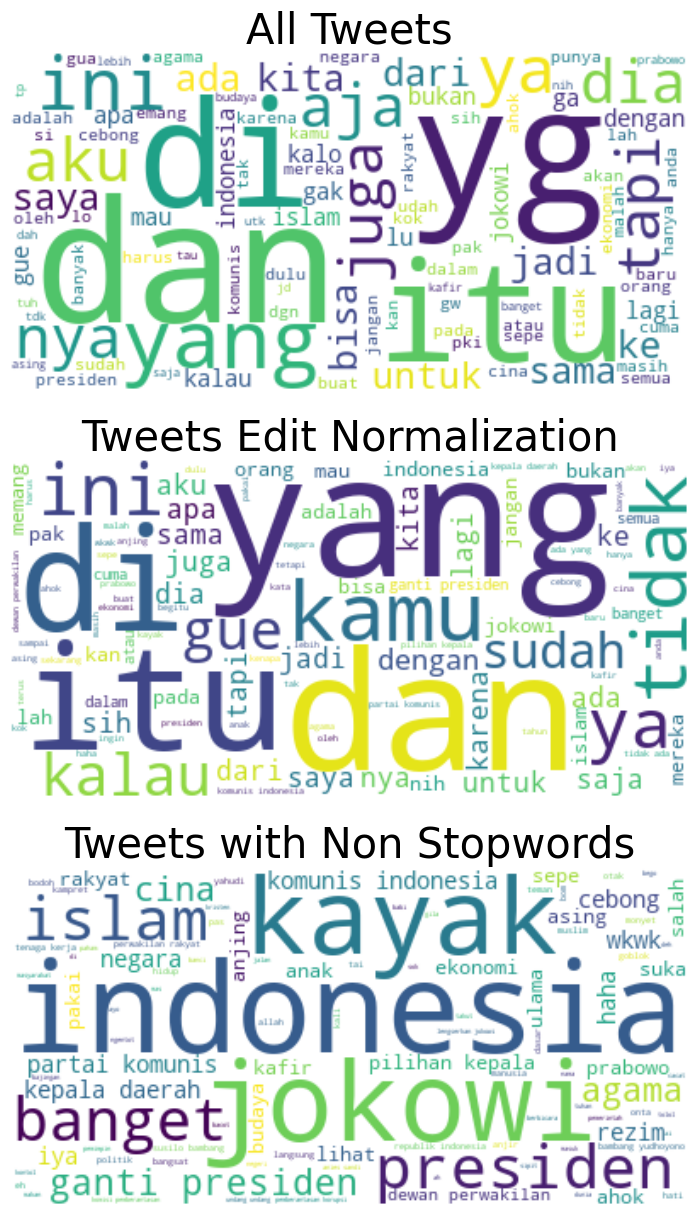

In [81]:
from wordcloud import WordCloud, ImageColorGenerator

# Create the parameter input
tweet_Clean = " ".join(text for text in df_visualization.clean_Tweet)
tweet_normalization = " ".join(text for text in df_visualization.Tweet_normalization)
tweet_Non_Stopwords = " ".join(text for text in df_visualization.Tweet_non_stopwords)

# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(tweet_Clean)
wordcloud_Edit_Alay = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(tweet_normalization)
wordcloud_Non_Stopwords = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(tweet_Non_Stopwords)

# Display the generated image:
fig, ax = plt.subplots(3, 1, figsize = (15,15))

ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_Edit_Alay, interpolation='bilinear')
ax[1].set_title('Tweets Edit Normalization',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_Non_Stopwords, interpolation='bilinear')
ax[2].set_title('Tweets with Non Stopwords',fontsize=30)
ax[2].axis('off')

# Mendeteksi Abusive Word Menggunakan File Abusive.csv

In [82]:
#filter Tweet normalization
df_abusive = pd.DataFrame(df[['Tweet_normalization']])
df_abusive.head()

,Tweet_normalization
0,"[di saat, semua, cowok, berusaha, melacak, per..."
1,"[siapa, yang, telat, memberi, tau, kamu, edan,..."
2,"[kadang, aku, berpikir, kenapa, aku, tetap, pe..."
3,"[aku, itu, aku, tau, matamu, sipit, tapi, dili..."
4,"[kaum, cebong, kafir, sudah, kelihatan, dongok..."


In [83]:
# Abusive word list
df_abusive_word = pd.read_csv(r"E:\BINAR\Binar-Gold-Challenge\Dataset\abusive.csv")
df_abusive_word.head()

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing


In [84]:
#convert abusive.csv into list
abusive_word_list = df_abusive_word['ABUSIVE'].values.tolist()
len(abusive_word_list)

125

## Menghitung Banyak Kata Abusive yang digunakan pada Sebuah Tweet

In [85]:
# count abusive words in tweet
def count_abusive_word(Tweet):
    i = 0
    for word in Tweet:
        if word in abusive_word_list:
            i += 1
    return i

In [86]:
df_abusive['count_abusive'] = df_abusive['Tweet_normalization'].apply(count_abusive_word)
df_abusive.head()

,Tweet_normalization,count_abusive
0,"[di saat, semua, cowok, berusaha, melacak, per...",1
1,"[siapa, yang, telat, memberi, tau, kamu, edan,...",2
2,"[kadang, aku, berpikir, kenapa, aku, tetap, pe...",0
3,"[aku, itu, aku, tau, matamu, sipit, tapi, dili...",1
4,"[kaum, cebong, kafir, sudah, kelihatan, dongok...",3


In [87]:
df_abusive['count_abusive'].value_counts()

count_abusive
0     5748
1     5282
2     1390
3      393
4      140
5       35
6       17
7        8
8        5
10       2
22       1
9        1
11       1
Name: count, dtype: int64

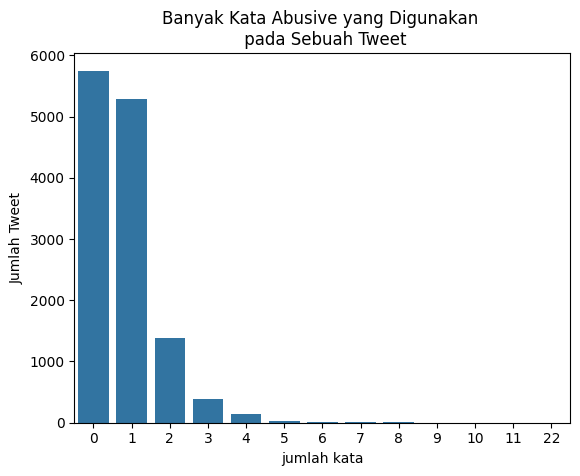

In [88]:
#Visualisasi banyak Tweet yang mengandung kata abusive berdasarkan jumlah kata yang terdapat dalam 1 tweet
sns.countplot(x='count_abusive', data=df_abusive)
plt.title('Banyak Kata Abusive yang Digunakan \n pada Sebuah Tweet', fontsize=12)
plt.xlabel('jumlah kata')
plt.ylabel('Jumlah Tweet')
plt.show()

**Kesimpulang:** dari diagram batang di atas, 0 kata Abusive memiliki frekuensi yang paling tinggi, kemudian frekuensi Tweet yang memiliki kata abusive terbanyak adalah 1 kata abusive

## Mendeteksi Tweet Yang Mengandung Kata Abusive (baru) 

In [89]:
# Determine Tweet that contain abusive word
def HS_word(Tweet):
    if Tweet > 0:
        i = 1
    else:
        i = 0
    return i

In [90]:
df_abusive['Abusive'] = df_abusive['count_abusive'].apply(HS_word)
df_abusive.head()

,Tweet_normalization,count_abusive,Abusive
0,"[di saat, semua, cowok, berusaha, melacak, per...",1,1
1,"[siapa, yang, telat, memberi, tau, kamu, edan,...",2,1
2,"[kadang, aku, berpikir, kenapa, aku, tetap, pe...",0,0
3,"[aku, itu, aku, tau, matamu, sipit, tapi, dili...",1,1
4,"[kaum, cebong, kafir, sudah, kelihatan, dongok...",3,1


In [91]:
Abusive_ = df_abusive['Abusive'].value_counts()
Abusive_

Abusive
1    7275
0    5748
Name: count, dtype: int64

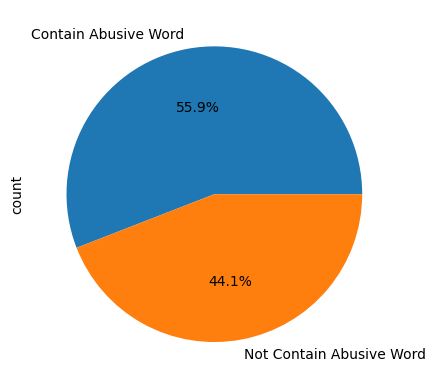

In [93]:
labels = ['Contain Abusive Word', 'Not Contain Abusive Word' ]
# Membuat visualisasi menggunakan pie chart
HS_abusive.plot(kind='pie', labels= labels, autopct='%1.1f%%')
plt.show()

# 10 Kata Abusive yang Paling Sering Digunakan

In [94]:
# Determain the list of abusive word in Tweet
def Abusive_word(Tweet):
    Tweet = [word for word in Tweet if word in abusive_word_list]
    return Tweet

In [95]:
df_abusive['Abusive_word'] = df_abusive['Tweet_normalization'].apply(lambda x: ' '.join(map(str, Abusive_word(x))))
df_abusive.head()

,Tweet_normalization,count_abusive,Abusive,Abusive_word
0,"[di saat, semua, cowok, berusaha, melacak, per...",1,1,bego
1,"[siapa, yang, telat, memberi, tau, kamu, edan,...",2,1,edan sarap
2,"[kadang, aku, berpikir, kenapa, aku, tetap, pe...",0,0,
3,"[aku, itu, aku, tau, matamu, sipit, tapi, dili...",1,1,sipit
4,"[kaum, cebong, kafir, sudah, kelihatan, dongok...",3,1,cebong kafir dungu


(-0.5, 399.5, 199.5, -0.5)

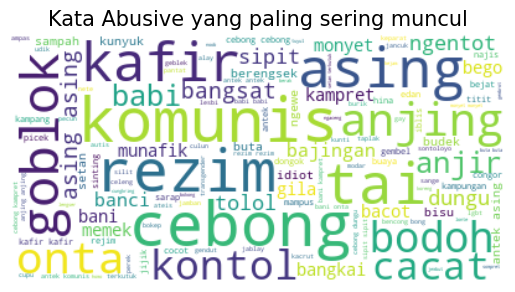

In [96]:
#Visualization abusive of word occurances
from wordcloud import WordCloud, ImageColorGenerator

# Start with one review:
Abusive_word = " ".join(text for text in df_abusive.Abusive_word)
Abusive_word = re.sub(r'  +', ' ', Abusive_word)

# Create and generate a word cloud image:
wordcloud_Abusive = WordCloud(max_font_size=50, max_words=124, background_color="white").generate(Abusive_word )

# Display the generated image:
#plt.figure(figsize  = (20,20))
plt.imshow(wordcloud_Abusive, interpolation='bilinear')
plt.title('Kata Abusive yang paling sering muncul', fontsize=15)
plt.axis('off')

In [97]:
df_abusive

,Tweet_normalization,count_abusive,Abusive,Abusive_word
0,"[di saat, semua, cowok, berusaha, melacak, per...",1,1,bego
1,"[siapa, yang, telat, memberi, tau, kamu, edan,...",2,1,edan sarap
2,"[kadang, aku, berpikir, kenapa, aku, tetap, pe...",0,0,
3,"[aku, itu, aku, tau, matamu, sipit, tapi, dili...",1,1,sipit
4,"[kaum, cebong, kafir, sudah, kelihatan, dongok...",3,1,cebong kafir dungu
...,...,...,...,...
13164,"[jangan, asal, berbicara, ndasmu, congor, kamu...",2,1,congor anjing
13165,"[kasur, mana, enak, kunyuk]",1,1,kunyuk
13166,"[hati, hati, bisu, tidak, bosan, duh]",1,1,bisu
13167,"[bom, yang, real, mudah, terdeteksi, bom, yang...",0,0,


In [98]:
Abusive_word

'bego edan sarap sipit cebong kafir dungu bani taplak kampret ngewe bacot banci jablay pecun onta kafir ampas monyet banci anjing noob setan cebong antek asing nete sipit homo ngentot gembel bangsat bajingan edan kafir bejat hina anjir bego bodoh gila kampret dungu dungu cebong nete bani iblis banci homo kafir bisu setan ateis bangsat bajingan homo cocot asing bangkai komunis ngentot babi asing asing asing rezim asing sipit kampang onta cebong najis transgender anjing titit bacot kafir bodoh iblis goblok bani cebong cebong rezim antek asing asing asing asing pecun cacat pantat bodoh idiot iblis tolol rezim komunis cebong berengsek ngentot kafir kafir homo culun bangsat bangkai terkutuk asing tolol tolol tolol tolol kampungan kampret memek lonte kontol banci onta bejat tai rezim bego antek bajingan buaya banci komunis kunyuk setan cebong kampungan cebong cebong congor bisu bani rezim silit cacat cebong cebong goblok bani kampret sampah monyet buaya cacat asing rezim komunis rezim tai ce

In [99]:
#Count Abusive Word
words = Abusive_word.split()

word_count = {}
for word in words:
    if word not in word_count:
        word_count[word] = 0
    word_count[word] += 1

In [100]:
word_count

{'bego': 121,
 'edan': 59,
 'sarap': 66,
 'sipit': 185,
 'cebong': 527,
 'kafir': 366,
 'dungu': 185,
 'bani': 166,
 'taplak': 51,
 'kampret': 207,
 'ngewe': 94,
 'bacot': 125,
 'banci': 138,
 'jablay': 47,
 'pecun': 28,
 'onta': 230,
 'ampas': 19,
 'monyet': 168,
 'anjing': 268,
 'noob': 18,
 'setan': 105,
 'antek': 267,
 'asing': 644,
 'nete': 39,
 'homo': 17,
 'ngentot': 148,
 'gembel': 55,
 'bangsat': 151,
 'bajingan': 143,
 'bejat': 61,
 'hina': 54,
 'anjir': 153,
 'bodoh': 181,
 'gila': 110,
 'iblis': 62,
 'bisu': 72,
 'ateis': 49,
 'cocot': 63,
 'bangkai': 111,
 'komunis': 360,
 'babi': 196,
 'rezim': 358,
 'kampang': 54,
 'najis': 60,
 'transgender': 26,
 'titit': 64,
 'goblok': 219,
 'cacat': 155,
 'pantat': 36,
 'idiot': 104,
 'tolol': 145,
 'berengsek': 107,
 'culun': 39,
 'terkutuk': 33,
 'kampungan': 57,
 'memek': 118,
 'lonte': 10,
 'kontol': 178,
 'tai': 267,
 'buaya': 66,
 'kunyuk': 106,
 'congor': 60,
 'silit': 37,
 'sampah': 96,
 'celeng': 22,
 'budek': 77,
 'mucikari

In [101]:
df_abusive_word_count = pd.DataFrame(word_count.items(), columns=['word', 'count'])
df_abusive_word_count.head()

,word,count
0,bego,121
1,edan,59
2,sarap,66
3,sipit,185
4,cebong,527


In [102]:
sort = df_abusive_word_count.nlargest(n=10, columns=['count'])
sort

,word,count
22,asing,644
4,cebong,527
5,kafir,366
39,komunis,360
41,rezim,358
18,anjing,268
21,antek,267
58,tai,267
15,onta,230
46,goblok,219


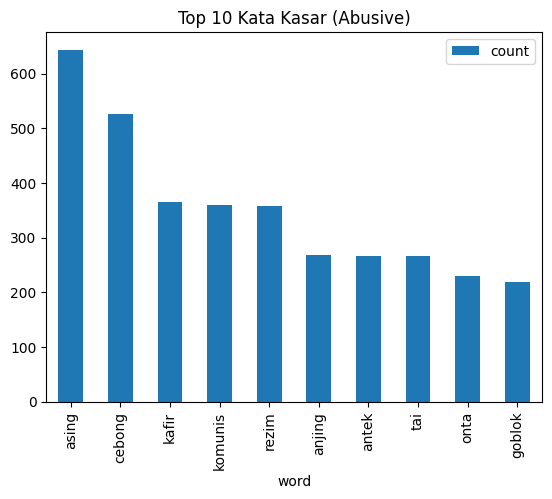

In [104]:
sort.plot.bar(x='word', y='count')
plt.title('Top 10 Kata Kasar (Abusive)')
plt.show()

**Kesimpulan:** Kata abusive yang paling sering digunakan asalah 'asing'